## **Consumer Complaint Resolution - Mini Project**

Import Libs

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


## Task 1

Loading Data Set

In [180]:
train_df = pd.read_csv('datasets/Datasets/Consumer_Complaints_train.csv')

In [181]:
train_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [182]:
train_df.shape

(358810, 18)

In [183]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

In [184]:
test_df = pd.read_csv('datasets/Datasets/Consumer_Complaints_test.csv')

In [185]:
test_df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [186]:
test_df.shape

(119606, 17)

In [187]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

## Task 2

Check the data type for both data (test file and train file)

In [188]:
train_df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object

In [189]:
test_df.dtypes

Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

Concatinating The two dataframes

In [190]:
data = pd.concat([train_df, test_df])

In [191]:
data.shape

(478416, 18)

## Task 3

Do missing value analysis and drop columns where more than 25% of data are missing

In [192]:
missing_values = data.isnull().sum()
missing_values/len(data)

Date received                   0.000000
Product                         0.000000
Sub-product                     0.289432
Issue                           0.000000
Sub-issue                       0.611652
Consumer complaint narrative    0.843036
Company public response         0.811062
Company                         0.000000
State                           0.008024
ZIP code                        0.008043
Tags                            0.859530
Consumer consent provided?      0.716801
Submitted via                   0.000000
Date sent to company            0.000000
Company response to consumer    0.000000
Timely response?                0.000000
Consumer disputed?              0.250004
Complaint ID                    0.000000
dtype: float64

In [193]:
columns_to_drop = missing_values[missing_values / len(data) >= 0.26].index
data = data.drop(columns=columns_to_drop)
data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [194]:
# filling the missing value with the mode

print(data['Consumer disputed?'].isnull().sum())

data['Consumer disputed?'] = data['Consumer disputed?'].fillna(data['Consumer disputed?'].mode()[0])
print(data['Consumer disputed?'].mode())
print(data['Consumer disputed?'].isnull().sum())

119606
0    No
dtype: object
0


In [195]:
# Droping missing value

# data.isnull().sum()/len(data)*100


In [196]:
# data.drop(['Sub-product', 'Sub-issue','Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?'], axis=1)

In [197]:
# test_df.isnull().sum()/len(test_df)*100

In [198]:
# test_df.drop(['Sub-product', 'Sub-issue','Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?'], axis=1)

## Task 4

Extracting Day, Month, and Year from Date Received Column and create new fields for a
month, year, and day

In [199]:
data['Date received'] = pd.to_datetime(data['Date received'])

data['Day_Received'] = data['Date received'].dt.day
data['Month_Received'] = data['Date received'].dt.month
data['Year_Received'] = data['Date received'].dt.year


In [200]:
data.head()

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Day_Received,Month_Received,Year_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,14,10,2015
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,26,4,2015
2,2013-12-20,Credit card,Other,Citibank,SC,29203,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394,20,12,2013
3,2016-03-03,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,Referral,2016-03-04,Closed with explanation,Yes,No,1815134,3,3,2016
4,2015-01-30,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613,30,1,2015


## Task 5

Calculate the Number of Days the Complaint was with the Company and create a new
field as “Days held”

In [201]:
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'])
data['Days_held'] = (data['Date sent to company'] - data['Date received']).dt.days


## Task 6

Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields

In [202]:
data.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID',
       'Day_Received', 'Month_Received', 'Year_Received', 'Days_held'],
      dtype='object')

In [203]:
data.drop(columns=['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], inplace=True)
test_df.drop(columns=['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], inplace=True)

## Task 7

Imputing Null value in “State” by Mode

In [204]:
data['State'].isnull().sum()


3839

In [205]:
data['State'].value_counts()

CA    70001
FL    46087
TX    35895
NY    32750
GA    21258
      ...  
MH       25
MP       15
AS       14
PW        9
AA        8
Name: State, Length: 62, dtype: int64

In [206]:
data['State'].mode()

0    CA
dtype: object

In [207]:
data['State'] = data['State'].fillna(data['State'].mode()[0])


## Task 8

with the help of the days we calculated above, create a new field 'Week_Received' where
we calculate the week based on the day of receiving.

In [208]:
data['Week_Received'] = data['Day_Received'].apply(lambda x: (x - 1) // 7 + 1)

In [209]:
data['Week_Received'].value_counts()

2    112520
3    112455
1    107977
4    107490
5     37974
Name: Week_Received, dtype: int64

## Task 9

store data of disputed people into the “disputed_cons” variable for future tasks

In [210]:
disputed_cons = data[data['Consumer disputed?'] == 'Yes']

In [211]:
len(disputed_cons)

76172

### Task 10 & Task 11
Plot bar graph of the total no of disputes of consumers with the help of seaborn

Plot bar graph of the total no of disputes products-wise with the help of seaborn

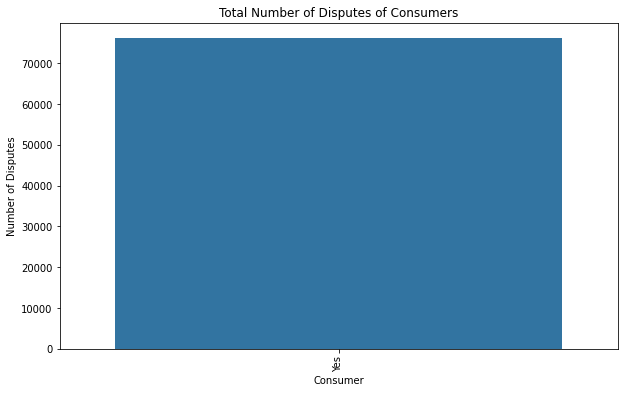

In [212]:
# Total disputes of consumers
plt.figure(figsize=(10,6))
sns.countplot(x='Consumer disputed?', data=disputed_cons)
plt.title('Total Number of Disputes of Consumers')
plt.xlabel('Consumer')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=90)
plt.show()

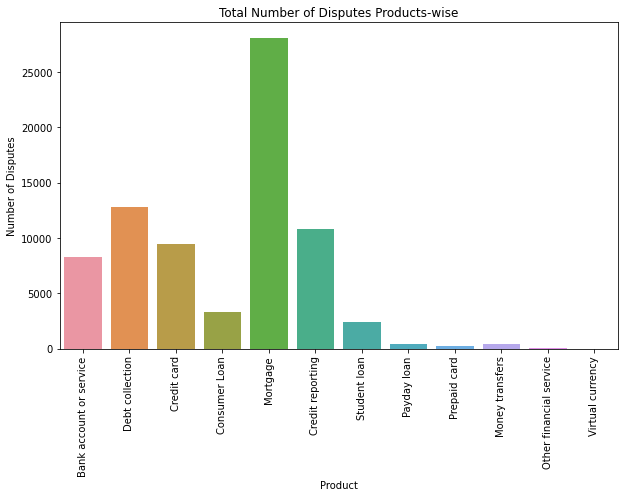

In [213]:
# Total disputes products-wise
plt.figure(figsize=(10,6))
sns.countplot(x='Product', data=disputed_cons)
plt.title('Total Number of Disputes Products-wise')
plt.xlabel('Product')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=90)
plt.show()

### Task 12

Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the
help of seaborn

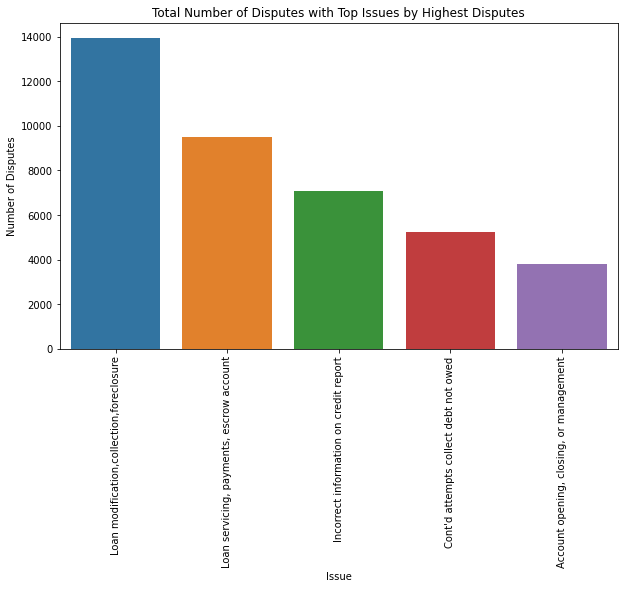

In [214]:
# Assuming 'Issue' is the column containing the issues
top_issues = disputed_cons['Issue'].value_counts().nlargest(5)  # Get top 5 issues with highest disputes
plt.figure(figsize =(10,6))
sns.barplot(x=top_issues.index, y=top_issues.values)
plt.title('Total Number of Disputes with Top Issues by Highest Disputes')
plt.xlabel('Issue')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=90)
plt.show()

### Task 13

Plot bar graph of the total no of disputes by State with Maximum Disputes

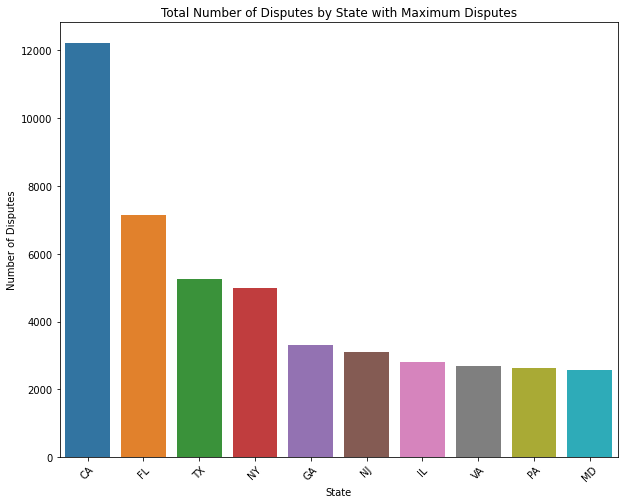

In [215]:
# Plot bar graph of Top States with Highest Disputes

state_max_disputes = disputed_cons['State'].value_counts().nlargest(10)
plt.figure(figsize=(10,8))
sns.barplot(x=state_max_disputes.index, y=state_max_disputes.values)
plt.title('Total Number of Disputes by State with Maximum Disputes')
plt.xlabel('State')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=45)
plt.show()

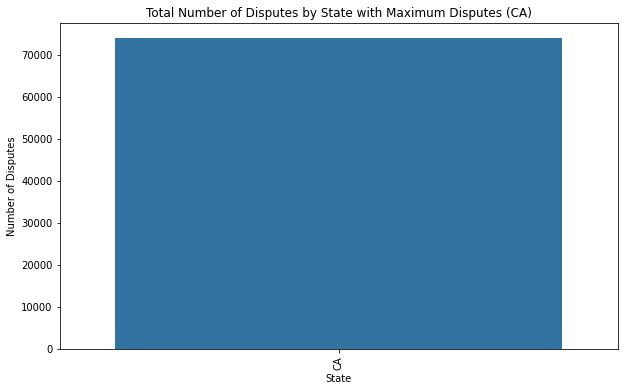

In [216]:
# Total disputes by State with Maximum Disputes
state_max_disputes = data['State'].value_counts().idxmax()  # Get state with maximum disputes
disputes_by_state_max = data[data['State'] == state_max_disputes]

plt.figure(figsize=(10,6))
sns.countplot(x='State', data=disputes_by_state_max)
plt.title(f'Total Number of Disputes by State with Maximum Disputes ({state_max_disputes})')
plt.xlabel('State')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=90)
plt.show()

### Task 14

Plot bar graph of the total no of disputes Submitted Via different source

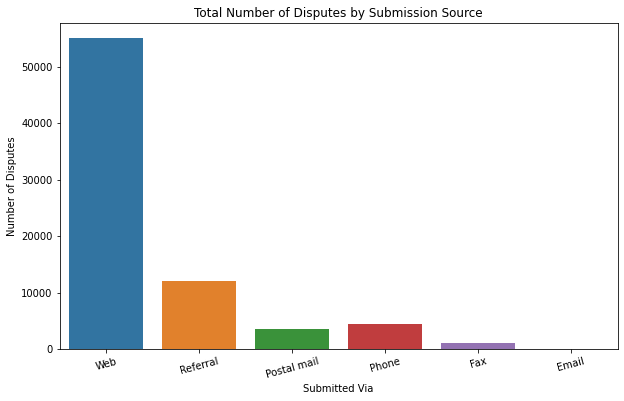

In [217]:
# Total disputes by Submitted Via
plt.figure(figsize=(10,6))
sns.countplot(x=disputed_cons["Submitted via"], data=disputed_cons)
plt.title('Total Number of Disputes by Submission Source')
plt.xlabel('Submitted Via')
plt.ylabel('Number of Disputes')
plt.xticks(rotation=15)
plt.show()

### Task 15

Plot bar graph of the total no of disputes where the Company's Response to the
Complaints

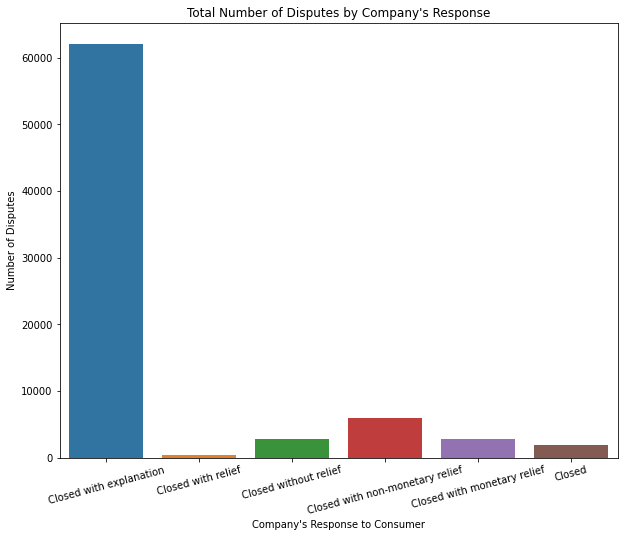

In [218]:
# Total disputes by Company's Response
plt.figure(figsize=(10,8))
sns.countplot(x=disputed_cons['Company response to consumer'], data=disputed_cons)
plt.title("Total Number of Disputes by Company's Response")
plt.xlabel("Company's Response to Consumer")
plt.ylabel('Number of Disputes')
plt.xticks(rotation=15)
plt.show()

### Task 16

Plot bar graph of the total no of disputes where the Company's Response Leads to
Disputes

In [219]:
disputed_cons['Company response to consumer'].unique()

array(['Closed with explanation', 'Closed with relief',
       'Closed without relief', 'Closed with non-monetary relief',
       'Closed with monetary relief', 'Closed'], dtype=object)

In [220]:
disputed_cons[disputed_cons['Company response to consumer'] == 'Closed with relief']

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day_Received,Month_Received,Year_Received,Days_held,Week_Received
8,Bank account or service,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,Web,Closed with relief,Yes,Yes,5,4,2012,0,1
106,Bank account or service,Problems caused by my funds being low,Fifth Third Financial Corporation,OH,Phone,Closed with relief,Yes,Yes,2,4,2012,1,1
485,Credit card,Credit card protection / Debt protection,Wells Fargo & Company,NE,Web,Closed with relief,Yes,Yes,5,12,2011,1,1
1562,Mortgage,"Loan modification,collection,foreclosure",JPMorgan Chase & Co.,CA,Web,Closed with relief,Yes,Yes,17,12,2011,4,3
1868,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,FL,Web,Closed with relief,Yes,Yes,17,4,2012,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
355687,Credit card,Other fee,Bank of America,AK,Web,Closed with relief,No,Yes,10,5,2012,1,2
356202,Mortgage,"Loan modification,collection,foreclosure",HSBC North America Holdings Inc.,TX,Referral,Closed with relief,Yes,Yes,24,2,2012,4,4
356658,Bank account or service,"Account opening, closing, or management",PNC Bank N.A.,MD,Phone,Closed with relief,Yes,Yes,17,4,2012,1,3
356874,Mortgage,"Loan servicing, payments, escrow account",M&T Bank Corporation,NJ,Web,Closed with relief,Yes,Yes,20,3,2012,1,3


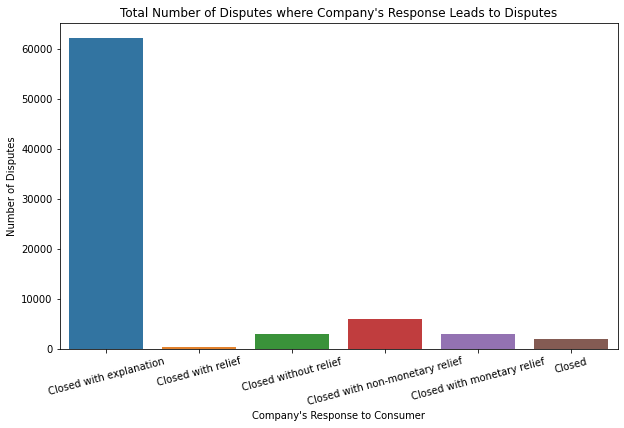

In [221]:
plt.figure(figsize=(10,6))
sns.countplot(x=disputed_cons['Company response to consumer'], data=disputed_cons)
plt.title("Total Number of Disputes where Company's Response Leads to Disputes")
plt.xlabel("Company's Response to Consumer")
plt.ylabel('Number of Disputes')
plt.xticks(rotation=15)
plt.show()

### Task 17

Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely
Response

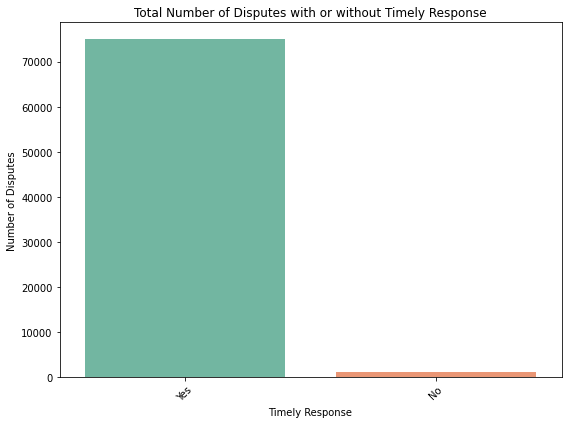

In [222]:
# Calculate the count of disputes for each category
disputes_by_response = disputed_cons['Timely response?'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8,6))
sns.barplot(x=disputes_by_response.index, y=disputes_by_response.values, palette="Set2")
plt.title("Total Number of Disputes with or without Timely Response")
plt.xlabel("Timely Response")
plt.ylabel("Number of Disputes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Task 18

Plot bar graph of the total no of disputes over Year Wise Complaints

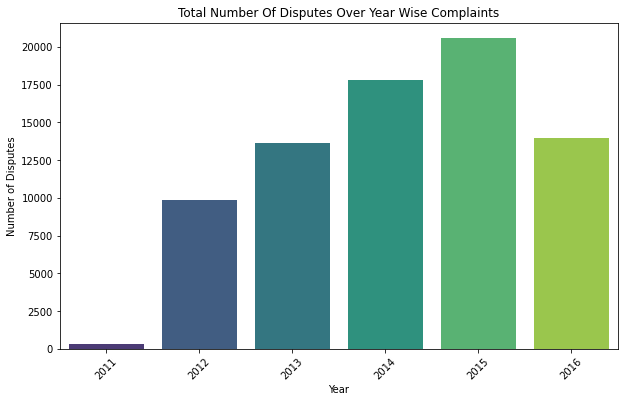

In [223]:
# Calculate the count of disputes for each year(year wise complaints)
complaint_by_year = disputed_cons["Year_Received"].value_counts().sort_index()

# Plot bar graph for year wise complaints
plt.figure(figsize=(10,6))
sns.barplot(x=complaint_by_year.index, y=complaint_by_year.values, palette="viridis")
plt.title("Total Number Of Disputes Over Year Wise Complaints")
plt.xlabel("Year")
plt.ylabel("Number of Disputes")
plt.xticks(rotation=45)
plt.show()


### Task 19

Plot bar graph of the total no of disputes over Year Wise Disputes

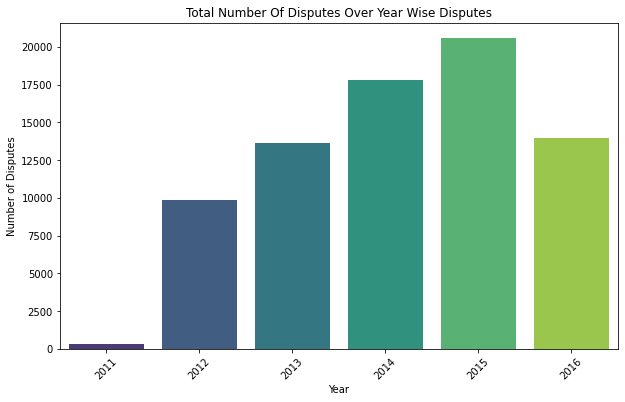

In [224]:
# Calculate the count of disputes for each year(year wise complaints)
complaint_by_year = disputed_cons["Year_Received"].value_counts().sort_index()

# Plot bar graph for year wise complaints
plt.figure(figsize=(10,6))
sns.barplot(x=complaint_by_year.index, y=complaint_by_year.values, palette="viridis")
plt.title("Total Number Of Disputes Over Year Wise Disputes")
plt.xlabel("Year")
plt.ylabel("Number of Disputes")
plt.xticks(rotation=45)
plt.show()


### Task 20

Plot bar graph of Top Companies with Highest Complaints

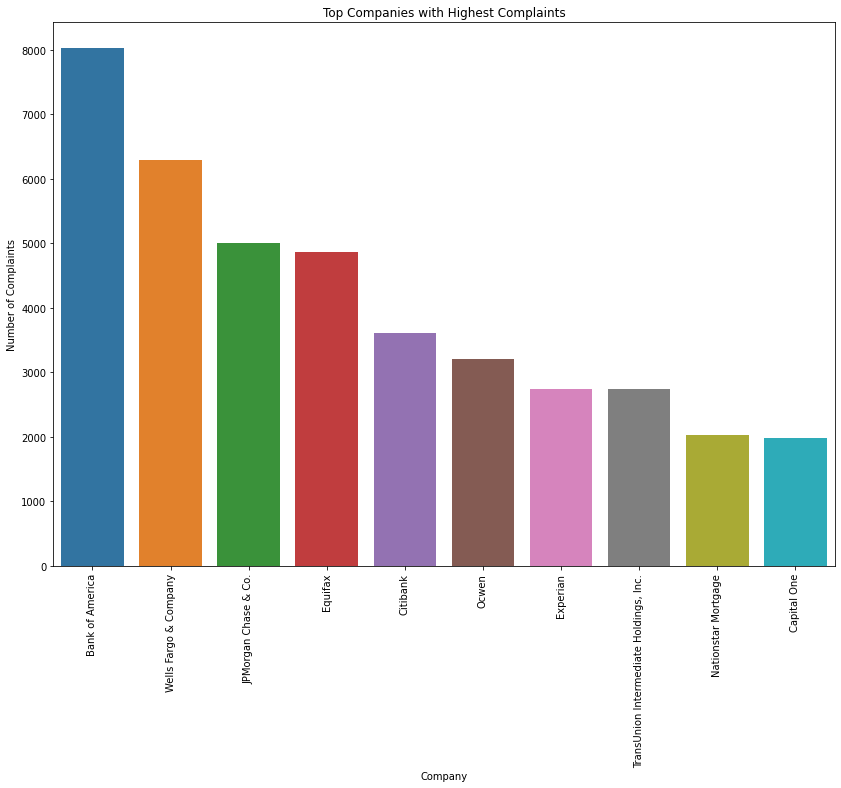

In [225]:
# Plot bar graph of Top Companies with Highest Complaints
plt.figure(figsize=(14,10))
top_companies = disputed_cons['Company'].value_counts().nlargest(10)
sns.barplot(x=top_companies.index, y=top_companies.values)
plt.title('Top Companies with Highest Complaints')
plt.xlabel('Company')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.show()

### Task 21

Converte all negative days held to zero (it is the time taken by the authority that can't be
negative)

In [226]:
disputed_cons.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day_Received', 'Month_Received', 'Year_Received',
       'Days_held', 'Week_Received'],
      dtype='object')

In [227]:
disputed_cons['Days_held']

1         0
4         0
5         5
7         0
8         0
         ..
358787    5
358791    1
358797    0
358798    0
358807    0
Name: Days_held, Length: 76172, dtype: int64

In [228]:
disputed_cons['Days_held'] = disputed_cons['Days_held'].apply(lambda x: max(x, 0))

C:\Users\GREAT SPEED\AppData\Local\Temp\ipykernel_12456\1579570485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disputed_cons['Days_held'] = disputed_cons['Days_held'].apply(lambda x: max(x, 0))


### Task 22

Drop Unnecessary Columns for the Model Building

In [229]:
columns_to_drop = ['Company', 'State', 'Year_Received', 'Days_held']
data.drop(columns=columns_to_drop, inplace=True)
data.head()

,Product,Issue,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Day_Received,Month_Received,Week_Received
0,Credit reporting,Incorrect information on credit report,Web,Closed with explanation,Yes,No,14,10,2
1,Bank account or service,Deposits and withdrawals,Web,Closed with explanation,Yes,Yes,26,4,4
2,Credit card,Other,Phone,Closed with non-monetary relief,Yes,No,20,12,3
3,Debt collection,Disclosure verification of debt,Referral,Closed with explanation,Yes,No,3,3,1
4,Debt collection,Disclosure verification of debt,Web,Closed with explanation,Yes,Yes,30,1,5


### Task 23

Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [230]:
data['Consumer disputed?'] = data['Consumer disputed?'].map({'Yes': 1, 'No': 0})


### Task 24

Create Dummy Variables for categorical features and concat with the original data frame
like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'


In [231]:
categorical_columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [232]:
data.head()

,Issue,Consumer disputed?,Day_Received,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,...,Submitted via_Phone,Submitted via_Postal mail,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_Yes
0,Incorrect information on credit report,0,14,10,2,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,Deposits and withdrawals,1,26,4,4,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,Other,0,20,12,3,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,Disclosure verification of debt,0,3,3,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,1
4,Disclosure verification of debt,1,30,1,5,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1


### Task 25

Scaling the Data Sets (note: discard dependent variable before doing standardization)
and Make feature Selection with the help of PCA up to 80% of the information.

In [233]:
X =  data.drop(columns=['Consumer disputed?'])
y = data['Consumer disputed?']

# Label Encoding the Issue column for categorical variable
label_encode = LabelEncoder()
X['Issue'] = label_encode.fit_transform(X['Issue'])

# Standardize the data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)



In [234]:
# Apply PCA
pca = PCA(n_components=0.8)  # Retain 80% of the variance
X_pca = pca.fit_transform(scaled_X)
X_pca.shape, pca.n_components_

((478416, 17), 17)

In [235]:
pca_data = pd.DataFrame(X_pca, columns=[f"PC{j}" for j in range(1, pca.n_components_ + 1)])
pca_data['Consumer disputed'] = y.reset_index(drop=True)

In [236]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,Consumer disputed
0,-0.865494,0.367582,-1.197731,-1.269489,0.432373,-0.932310,-0.589038,0.398897,-0.165051,0.049524,-0.139790,-0.278318,-0.285347,0.106861,-0.062549,0.186696,0.055018,0
1,-0.468761,-1.714671,-0.591150,0.255882,-0.363130,-0.079310,-0.430110,-0.411430,-0.005317,0.018437,-0.026892,-0.064658,0.056969,-0.023909,-0.059372,-0.039673,0.302752,1
2,-0.665800,0.120506,3.108304,0.258328,1.210385,-1.022859,2.180378,-0.516766,-0.731997,0.399452,-0.884977,-0.263517,-0.546878,-0.009203,0.204657,0.322454,0.593492,0
3,1.077363,1.811987,-0.349733,1.399624,1.456459,1.366111,-0.056254,0.468660,0.839970,-1.098111,-0.354204,-0.164142,-0.150863,-0.013271,-0.093815,0.145266,0.485003,0
4,-1.122452,-2.706470,-0.792828,1.002196,0.255185,1.141338,-0.024511,-0.627567,0.411376,-0.061496,-0.162611,-0.108468,0.556030,-0.137024,-0.083913,-0.120599,0.584529,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478411,-0.838585,0.906168,-0.252156,1.476566,-0.665551,-1.009552,-1.471811,-0.917463,0.402301,0.445851,-0.221004,-0.133578,0.389070,-0.125704,-0.008403,0.160261,0.576815,0
478412,-1.071072,0.582933,-0.285276,1.922685,-0.164514,-1.434125,-1.339512,0.534430,0.125229,0.418781,-0.390132,-0.221718,0.170300,-0.089465,0.112553,0.541885,0.096050,0
478413,2.712315,0.609937,2.981389,-0.396698,-1.777642,2.704587,-0.454853,-1.539468,-0.508748,-0.444937,1.420769,0.188971,1.104687,-0.632013,0.340616,0.853209,0.429970,0
478414,-0.822670,1.476476,-1.360134,-1.256888,0.332788,-0.699074,-0.735750,-0.215599,-0.081004,0.040374,-0.064444,-0.233237,-0.206325,0.082988,-0.111634,0.029510,0.308404,0


### Task 26

Splitting the Data Sets Into X and Y by the dependent and independent variables (data
selected by PCA)

In [238]:
X_pca =  pca_data.drop(columns=['Consumer disputed'])
y_pca = pca_data['Consumer disputed']

In [239]:
x_train,x_test,y_train,y_test = train_test_split(X_pca,y_pca,test_size=0.2, random_state=0)

In [240]:
y_train.shape

(382732,)

In [241]:
x_train.shape

(382732, 17)

In [242]:
y_test.shape

(95684,)

In [243]:
x_test.shape

(95684, 17)

### Task 27

Build given models and measure their test and validation accuracy:

In [244]:
# Training Multiple Models
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train, y_train)

c:\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [245]:
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(x_train, y_train)


k_neighbors = KNeighborsClassifier()
k_neighbors.fit(x_train, y_train)

KNeighborsClassifier()

### Task 28

Whoever gives the most accurate result uses it and predicts the outcome for the test file
and fills its dispute column so the business team can take some action accordingly.

In [246]:
# Predicting using the Models
pred_test_logReg = logistic_model.predict(x_test) 
pred_test_randomForest = random_forest.predict(x_test) 
pred_test_decisionTree = decision_tree.predict(x_test) 
pred_test_k_nn = k_neighbors.predict(x_test) 
pred_test_gradient = gradient_boost.predict(x_test) 
pred_test_adaBoost = ada_boost.predict(x_test) 

In [247]:
logistic_accuracy = accuracy_score(y_test,pred_test_logReg)
decision_accuracy = accuracy_score(y_test,pred_test_decisionTree)
random_accuracy = accuracy_score(y_test,pred_test_randomForest)
adaBoost_accuracy = accuracy_score(y_test,pred_test_adaBoost)
gradient_accuracy = accuracy_score(y_test,pred_test_gradient)
kNN_accuracy = accuracy_score(y_test,pred_test_k_nn)


In [248]:
print('Logistic Regression Accuracy is:',logistic_accuracy)
print('Decision Tree Accuracy is:',decision_accuracy)
print('Random Forest Accuracy is:',random_accuracy)
print('AdaBoost Accuracy is:',adaBoost_accuracy)
print('Gradient Boost Accuracy is:',gradient_accuracy)
print('KNeighbors Classifier Accuracy is:',kNN_accuracy)

Logistic Regression Accuracy is: 0.8421679695664896
Decision Tree Accuracy is: 0.8198026838342879
Random Forest Accuracy is: 0.8221437230884996
AdaBoost Accuracy is: 0.8421679695664896
Gradient Boost Accuracy is: 0.8421679695664896
KNeighbors Classifier Accuracy is: 0.8187784791605702


In [249]:
# Comparing AdaBoost Model and Logistic Model
adaBoost_accuracy == logistic_accuracy

True

In [250]:
# Selecting the best Model
highest_model = max([logistic_accuracy, decision_accuracy, random_accuracy, adaBoost_accuracy, gradient_accuracy, kNN_accuracy])
print('The best model: ',highest_model)


The best model:  0.8421679695664896


In [251]:
best_model = logistic_model if logistic_accuracy == adaBoost_accuracy else ada_boost

In [252]:
test_prediction = best_model.predict(x_test)

In [253]:
test_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [254]:
test_prediction.shape, x_test.shape

((95684,), (95684, 17))

In [255]:
pd.Series(test_prediction)

0        0
1        0
2        0
3        0
4        0
        ..
95679    0
95680    0
95681    0
95682    0
95683    0
Length: 95684, dtype: int64

In [256]:
x_test['Consumer disputed'] = pd.Series(test_prediction)

In [257]:
x_test['Consumer disputed'] = x_test['Consumer disputed'].map({1:'Yes', 0:'No'})
# Saving the updated test_file with the predicted outcomes
x_test.to_csv("Predicted_file.csv")